In [103]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd # to read and manipulating data 
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [104]:
#Load dataset to start EDA
#Changing working directory
os.chdir(r'C:\Users\kaviy\OneDrive\Desktop\CIP\DATASET')

# To read 'csv' file with panda library
df = pd.read_csv('Fertilizer Prediction.csv')

In [105]:
# To display the first 10 rows of dataset
display(df.head(10))

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,alluvial,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,alluvial,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,alluvial,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [106]:
# To find Column name
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer '],
      dtype='object')

In [107]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(99, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  99 non-null     int64 
 1   Humidity     99 non-null     int64 
 2   Moisture     99 non-null     int64 
 3   Soil Type    99 non-null     object
 4   Crop Type    99 non-null     object
 5   Nitrogen     99 non-null     int64 
 6   Potassium    99 non-null     int64 
 7   Phosphorous  99 non-null     int64 
 8   Fertilizer   99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


None

In [108]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [109]:
df.isnull().values.any()

False

In [110]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [111]:
# statistics of the category variables
display(df.describe(include='object'))

,Soil Type,Crop Type,Fertilizer
count,99,99,99
unique,5,11,7
top,Loamy,Sugarcane,Urea
freq,21,13,22


In [112]:
import matplotlib.pyplot as plt # to visualize graph
%matplotlib inline 
import seaborn as sns # for better visualization of graph with the help of Matplotlib
%pip install dython 
from dython import nominal # to find out correlation and visualize it

Note: you may need to restart the kernel to use updated packages.


In [113]:
# print the unique class of the Fertilizer 
print(df['Fertilizer '].unique())

['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [114]:
print("Soil : ", df['Soil Type'].unique())

Soil :  ['alluvial' 'Loamy' 'Black' 'Red' 'Clayey']


<AxesSubplot:xlabel='count', ylabel='Fertilizer '>

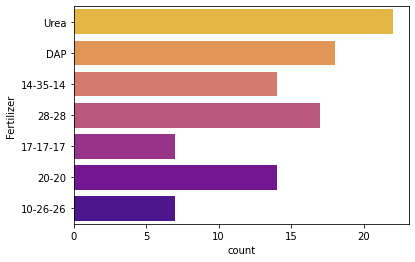

In [115]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer ',data=df,palette="plasma_r")

In [116]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer '])

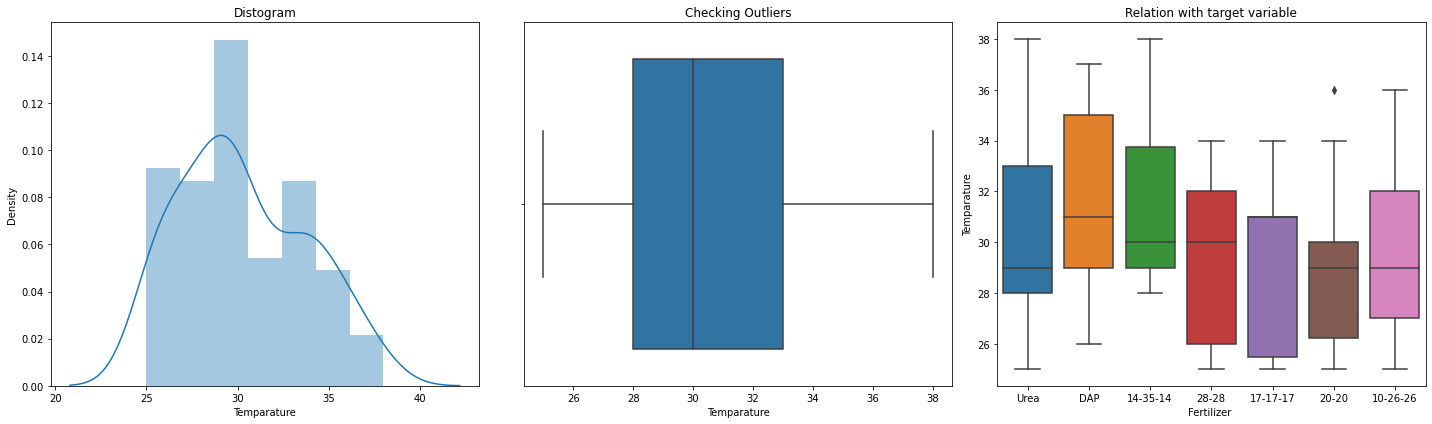

In [117]:
# EDA - Temparature variable
plot_conti(df['Temparature'])

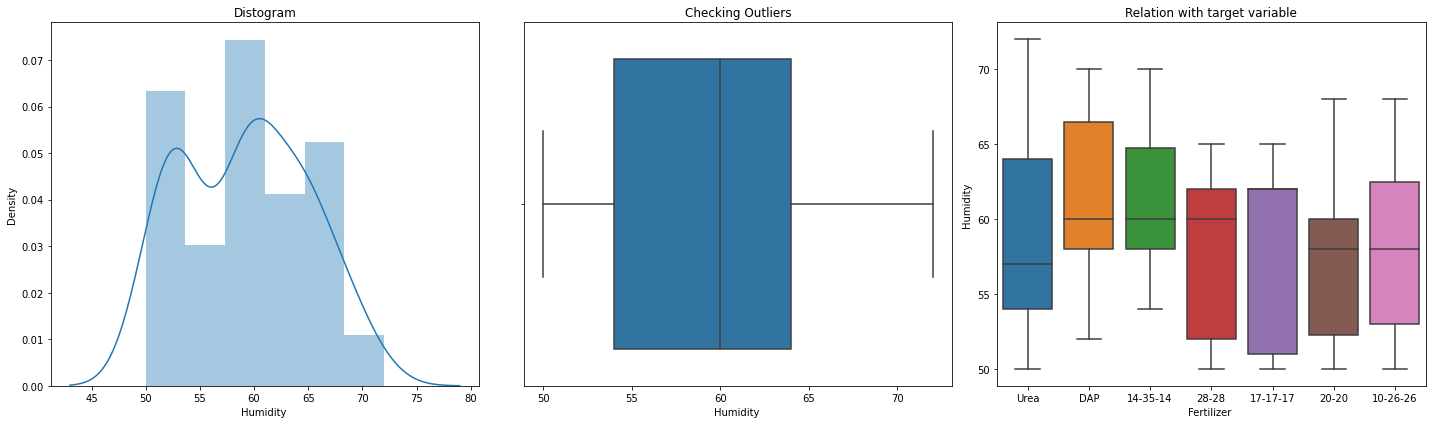

In [118]:
#EDA - Humidity variable
plot_conti(df['Humidity '])

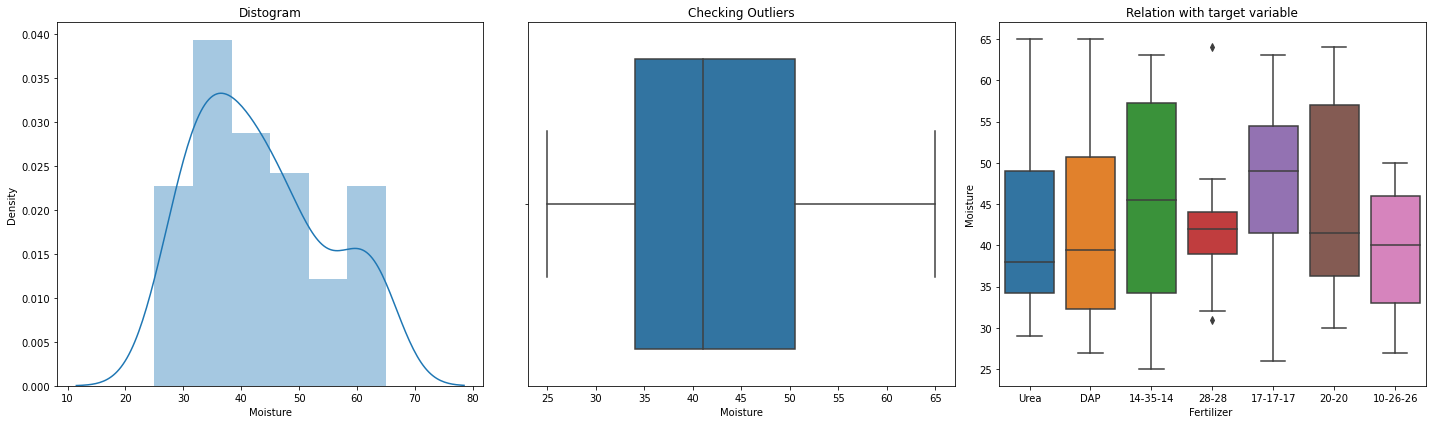

In [119]:
#EDA - Rainfall variable
plot_conti(df['Moisture'])

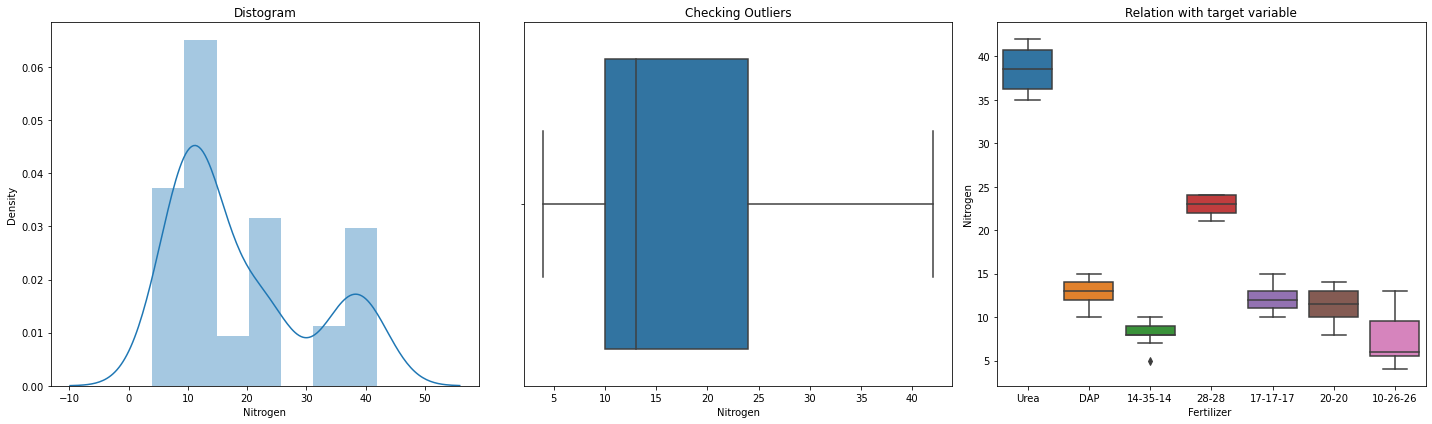

In [120]:

plot_conti(df['Nitrogen'])

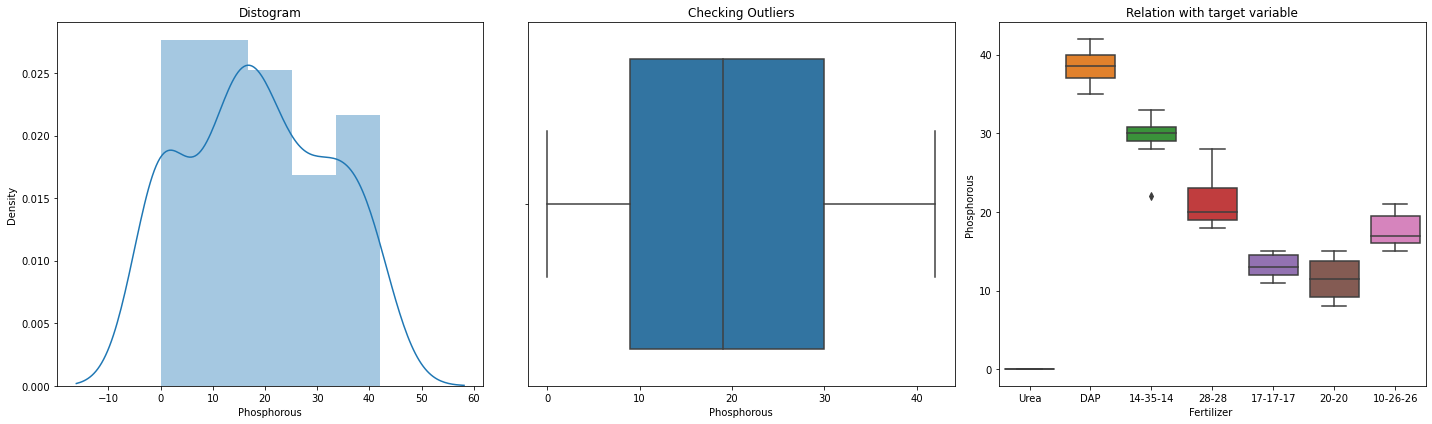

In [121]:
# EDA - Phosphorous variable
plot_conti(df['Phosphorous'])

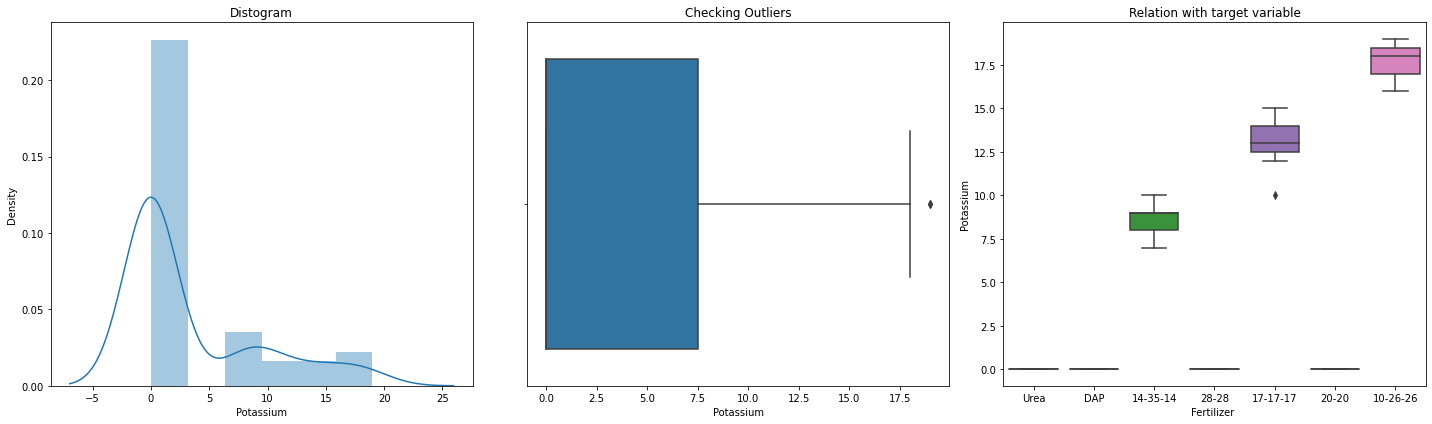

In [122]:
plot_conti(df['Potassium'])

In [123]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer '], ax=axes[1])

In [124]:
# print the unique types of the Soil
print("Soil Type : ", df['Soil Type'].unique())

Soil Type :  ['alluvial' 'Loamy' 'Black' 'Red' 'Clayey']


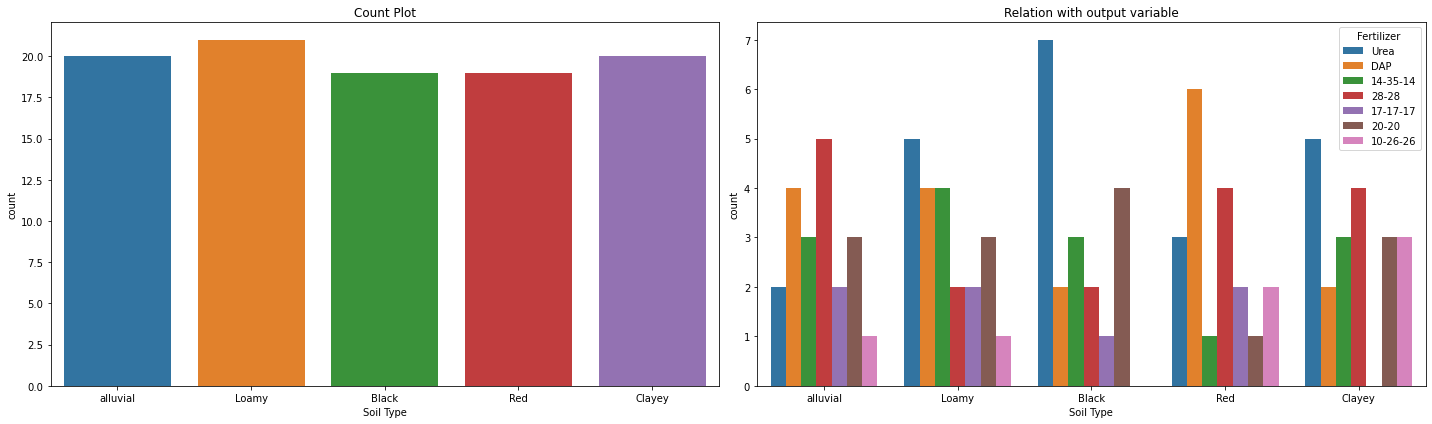

In [125]:
plot_cato(df['Soil Type'])

In [126]:
# print the unique types of the Crop
print("Crop: ", df['Crop Type'].unique())

Crop:  ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']


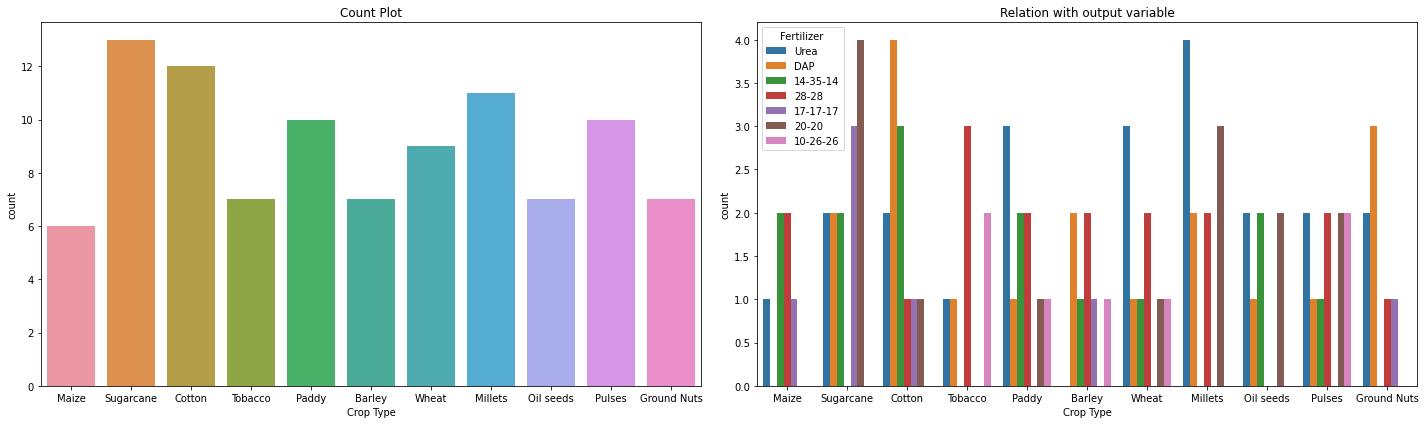

In [127]:
plot_cato(df['Crop Type'])

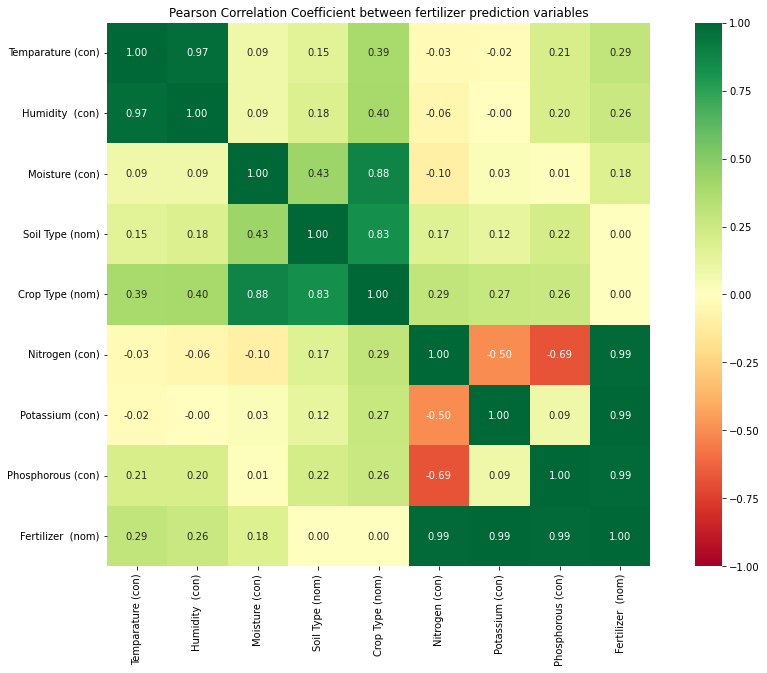

{'corr':                    Temparature (con)  Humidity  (con)  Moisture (con)  \
 Temparature (con)           1.000000         0.973164        0.091222   
 Humidity  (con)             0.973164         1.000000        0.091342   
 Moisture (con)              0.091222         0.091342        1.000000   
 Soil Type (nom)             0.154873         0.182937        0.426168   
 Crop Type (nom)             0.385183         0.397787        0.880808   
 Nitrogen (con)             -0.033771        -0.060646       -0.095945   
 Potassium (con)            -0.023424        -0.003833        0.027727   
 Phosphorous (con)           0.207545         0.204044        0.009276   
 Fertilizer  (nom)           0.290043         0.258220        0.179475   
 
                    Soil Type (nom)  Crop Type (nom)  Nitrogen (con)  \
 Temparature (con)         0.154873         0.385183       -0.033771   
 Humidity  (con)           0.182937         0.397787       -0.060646   
 Moisture (con)            0.42616

In [128]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(16,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

In [129]:
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
from sklearn.model_selection import train_test_split # to split data into training and testing sets

In [130]:
X = df.drop(['Fertilizer '], axis=1) #feature variables
y = df[['Fertilizer ']] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

The shape of feature set, X is  (99, 8)
The shape of target, y is  (99, 1)


In [131]:
#Label Encoding 
le = LabelEncoder()
df['Fertilizer ']= le.fit_transform(df['Fertilizer '])
df['Soil Type']= le.fit_transform(df['Soil Type'])
df['Crop Type']= le.fit_transform(df['Crop Type'])

In [132]:
display(df.head())

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [77]:
#Label Encoding 
le = LabelEncoder()
#df['Fertilizer ']= le.fit_transform(df['Fertilizer '])
df['Soil Type']= le.fit_transform(df['Soil Type'])
df['Crop Type']= le.fit_transform(df['Crop Type'])

In [78]:
display(df.head())

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
print(scaled_df)

    Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0      0.076923   0.090909     0.325       1.00        0.3  0.868421   
1      0.307692   0.090909     0.500       0.50        0.8  0.210526   
2      0.692308   0.681818     0.925       0.00        0.1  0.078947   
3      0.538462   0.545455     0.225       0.75        0.9  0.473684   
4      0.230769   0.181818     0.525       0.25        0.6  0.815789   
5      0.076923   0.090909     0.250       1.00        0.0  0.210526   
6      0.000000   0.000000     0.975       0.75        0.1  0.131579   
7      0.615385   0.636364     0.625       0.50        1.0  0.973684   
8      0.384615   0.454545     0.425       1.00        0.4  0.447368   
9      0.307692   0.363636     0.200       0.00        0.5  0.131579   
10     0.153846   0.181818     0.075       0.25        0.7  0.236842   
11     0.461538   0.545455     0.575       1.00        0.3  0.263158   
12     0.000000   0.000000     1.000       0.50        0.1  0.84

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (69, 8)
Shape of X_test is (30, 8)
Shape of y_train is (69, 1)
Shape of y_test is (30, 1)


In [135]:
X = df[df.columns[:-1]]
Y = df['Fertilizer ']   
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.33,
                                                   random_state=42, 
                                                   stratify=y)
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (66, 8)
Shape of X_test is (33, 8)
Shape of y_train is (66, 1)
Shape of y_test is (33, 1)


In [136]:
# Importing libraries for classification and performance evaluation
from sklearn.neighbors import KNeighborsClassifier #to build KNeighbors model
from sklearn.model_selection import GridSearchCV # to best select hyperparameter

from sklearn.metrics import accuracy_score, classification_report # to calcutate accuracy of model
from sklearn.metrics import classification_report #to calculte precision, recall, f1-score
from sklearn.metrics import plot_confusion_matrix # to draw confusion_matrix

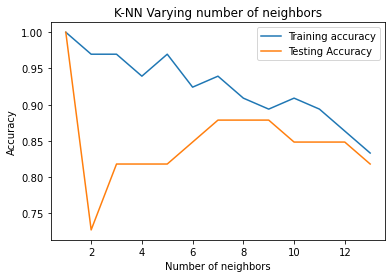

In [137]:
# To determine the k value with highest accuracy  
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [138]:
# Create K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_knn = model_knn.fit(X_train, y_train)

In [139]:
#Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)

In [140]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.8181818181818182


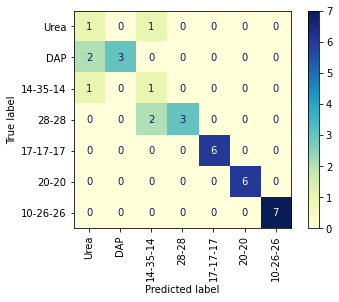

In [141]:
## To visualize confusion matrix
plot_confusion_matrix(model_knn, 
                      X_test, 
                      y_test, 
                      display_labels=['Urea' ,'DAP', '14-35-14', '28-28', '17-17-17', '20-20', '10-26-26'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [142]:
#Classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

    10-26-26       0.25      0.50      0.33         2
    14-35-14       1.00      0.60      0.75         5
    17-17-17       0.25      0.50      0.33         2
       20-20       1.00      0.60      0.75         5
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           0.82        33
   macro avg       0.79      0.74      0.74        33
weighted avg       0.91      0.82      0.84        33



In [143]:
from sklearn.ensemble import GradientBoostingClassifier #to build GradientBoosting model
from sklearn.ensemble import RandomForestClassifier #to build RandomForest model
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import GridSearchCV # to best select hyperparameter

In [144]:
#Decision Tree model
#random state (int): Controls the randomness of the estimator for reproducibility
model_DT = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
model_DT = model_DT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)

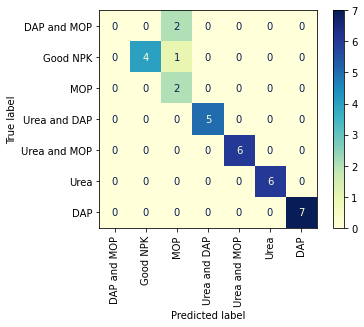

In [145]:
# To visualize confusion matrix
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [146]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))
#Classification report
print(classification_report(y_test, y_pred_DT))

Accuracy:  0.9090909090909091
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       1.00      0.80      0.89         5
    17-17-17       0.40      1.00      0.57         2
       20-20       1.00      1.00      1.00         5
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           0.91        33
   macro avg       0.77      0.83      0.78        33
weighted avg       0.90      0.91      0.90        33



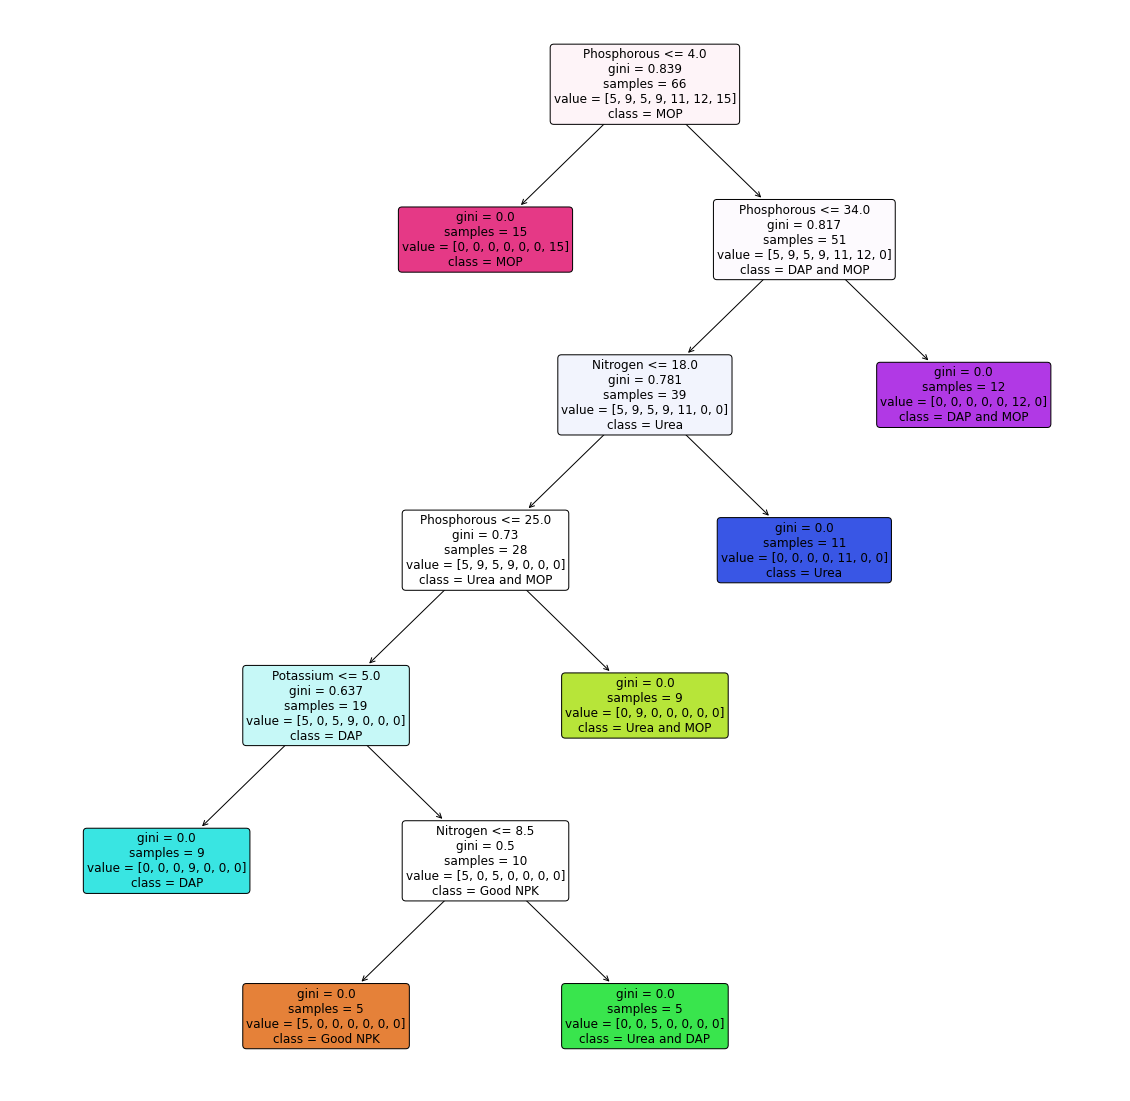

In [147]:
# Visualizing Decision Tree 
plt.figure(figsize = (20, 20))
plot_tree(model_DT, 
        filled=True,
        rounded=True,
        class_names = ['Good NPK', 'Urea and MOP','Urea and DAP', 'DAP','Urea', 'DAP and MOP', 'MOP'],
        feature_names = X.columns,
        fontsize=12)

plt.show()

In [148]:
# Hyperparameters
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

# GridSearchCV: to find the best hyperparameters based on the scoring method
#CV: Cross validation
grid_search_DT = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

In [149]:
# fit the model with the best hyper-parameters
grid_result_DT = grid_search_DT.fit(X_train, y_train)

In [150]:
# Best hyperparameters in the grid search
grid_result_DT.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [151]:
#Cross validation result
cv_result = pd.DataFrame(grid_result_DT.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,gini,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
6,entropy,4,0.928571,1.000000,0.923077,1.000000,1.000000,0.970330,0.036380,3
7,entropy,5,0.928571,1.000000,0.923077,1.000000,1.000000,0.970330,0.036380,3
8,entropy,6,0.928571,1.000000,0.923077,1.000000,1.000000,0.970330,0.036380,3
9,entropy,7,0.928571,1.000000,0.923077,1.000000,1.000000,0.970330,0.036380,3
2,gini,5,0.928571,0.923077,0.923077,0.923077,0.923077,0.924176,0.002198,7
5,entropy,3,0.928571,0.923077,0.923077,0.923077,0.923077,0.924176,0.002198,7
1,gini,4,0.857143,0.846154,0.846154,0.846154,0.846154,0.848352,0.004396,9
0,gini,3,0.714286,0.615385,0.692308,0.692308,0.692308,0.681319,0.034048,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [152]:
#Prediction
y_pred_Grid = grid_result_DT.predict(X_test)

In [153]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_Grid))

#Classification report
print(classification_report(y_test, y_pred_Grid))

Accuracy:  0.9090909090909091
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       1.00      0.80      0.89         5
    17-17-17       0.40      1.00      0.57         2
       20-20       1.00      1.00      1.00         5
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           0.91        33
   macro avg       0.77      0.83      0.78        33
weighted avg       0.90      0.91      0.90        33



In [154]:
#Random Forest model
model_RF = RandomForestClassifier(random_state=92)

# Train the model using the training sets
model_RF = model_RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_RF = model_RF.predict(X_test)

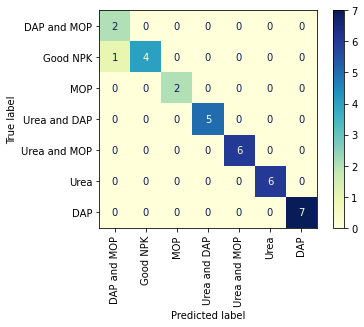

In [155]:
# To visualize confusion matrix
plot_confusion_matrix(model_RF, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [156]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_RF))

#Classification report
print(classification_report(y_test, y_pred_RF))

Accuracy:  0.9696969696969697
              precision    recall  f1-score   support

    10-26-26       0.67      1.00      0.80         2
    14-35-14       1.00      0.80      0.89         5
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         5
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           0.97        33
   macro avg       0.95      0.97      0.96        33
weighted avg       0.98      0.97      0.97        33



In [157]:
#Gradient Boosting model
model_GB = GradientBoostingClassifier()
model_GB= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
model_GB.score(X_test, y_test)

# Train the model using the training sets
#model_GB = model_GB.fit(X_train, y_train)

0.9696969696969697

In [158]:
#Predict the response for test dataset
y_pred_GB = model_GB.predict(X_test)

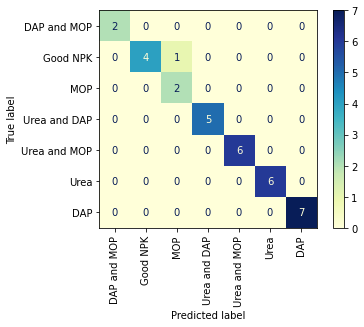

In [159]:
# To visualize confusion matrix
plot_confusion_matrix(model_GB, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [160]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_GB))

#Classification report
print(classification_report(y_test, y_pred_GB))

Accuracy:  0.9696969696969697
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      0.80      0.89         5
    17-17-17       0.67      1.00      0.80         2
       20-20       1.00      1.00      1.00         5
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           0.97        33
   macro avg       0.95      0.97      0.96        33
weighted avg       0.98      0.97      0.97        33



In [161]:
print("Model\t\t\tAccuracy of the model") 
print("""K-Nearest Neighbors\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Decision Tree\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_RF)))
print("""Gradient Boosting\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_GB)))

Model			Accuracy of the model
K-Nearest Neighbors		 0.8182
Decision Tree			 0.9091
Random Forest			 0.9697
Gradient Boosting		 0.9697


In [162]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
5,26,52,35,4,0,12,10,13,2
6,25,50,64,3,1,9,0,10,3
7,33,64,50,2,10,41,0,0,6
8,30,60,42,4,4,21,0,18,4
9,29,58,33,0,5,9,7,30,1


In [178]:
#For K-Nearest Neighbours model
#data = np.array([[28, 96, 17, 6,77, 4, 4, 4]])
#i = df.iloc[45,] - gets 45th row from dataframe
i = get_crop('Pulses')
i = i.drop(['Fertilizer '])
prediction = 
(np.array(i).reshape(1,-1))
print(prediction)

['DAP']


In [169]:
def get_crop(crop):
    for i, row in df.iterrows():
        if le.classes_[row['Crop Type']] == crop:
            return row

In [165]:
i = get_paddy()
print(np.array(i))

[28 54 46  1  6 35  0  0  6]


In [166]:
le.classes_

array(['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds',
       'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'], dtype=object)